In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from calibrate import *

In [2]:
impath = '/home/hiram/Documentos/Tesis/Tesis_latex/Imagenes/'

# Gain $\eta(\nu)$

In [3]:
from test import *

In [4]:
freqs = np.linspace(1e-21,250, 32769)

In [5]:
eta_nu = eta(freqs)

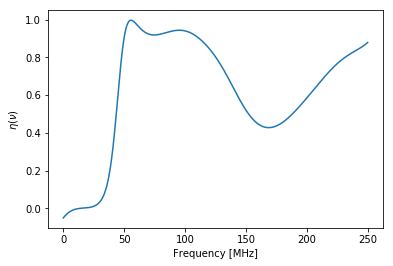

In [6]:
plt.plot(freqs,eta_nu)
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$\eta(\nu)$')
plt.savefig(impath+'efficiency.png')

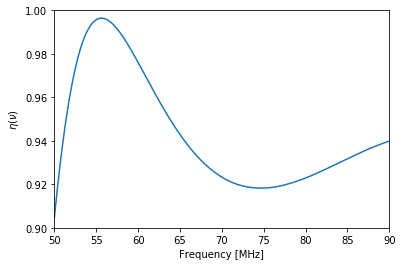

In [7]:
plt.plot(freqs,eta_nu)
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$\eta(\nu)$')
plt.xlim(50,90)
plt.ylim(0.9,1.)
plt.savefig(impath+'efficiency_50to90.png')

# Check whole data quality

In [8]:
Temps = pd.read_hdf('calibration/Days14_15.hdf5')
log_Temps = np.log10(Temps)

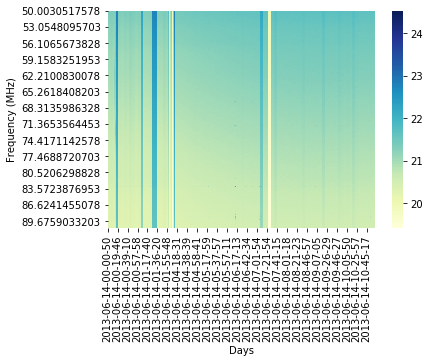

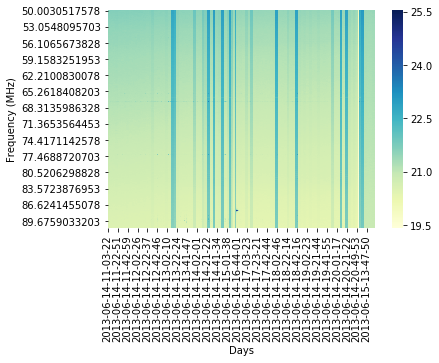

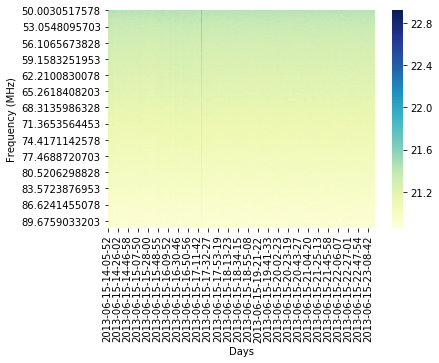

In [7]:
cols = Temps.columns.values
sb.heatmap(log_Temps[cols[0:2500]], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frequency (MHz)')
plt.savefig('Imagenes/Data_%s_%s.png'%(cols[0],cols[2500]))
plt.show()

sb.heatmap(log_Temps[cols[2500:5000]], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frequency (MHz)')
plt.savefig('Imagenes/Data_%s_%s.png'%(cols[2500],cols[5000]))
plt.show()

sb.heatmap(log_Temps[cols[5000:]], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frequency (MHz)')
plt.savefig('Imagenes/Data_%s_%s.png'%(cols[5000],cols[-1]))
plt.show()

# Check data quality

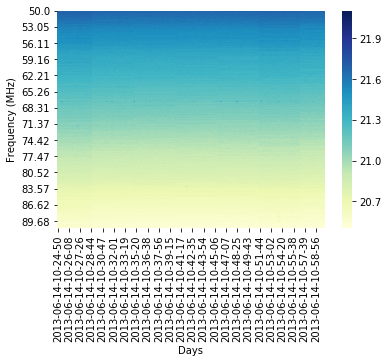

In [8]:
path = 'calibration/Days14_15.hdf5'
dates = ['2013-06-14-10-24-50','2013-06-14-10-59-52']
Check_quality(path,dates,savepath = impath)

# Selecting Dates

In [9]:
paths = 'calibration/Days14_15.hdf5'
paths_jnc = ('calibration/Days14_15_93dBm.hdf5','calibration/Kjnc_Days14_15_93dBm.hdf5')
dates = ['2013-06-14-10-24-50','2013-06-14-10-59-52','2013-06-14 10:30:00.000','2013-06-14 11:00:00.000']

$\chi^2$

In [10]:
K_nu,Tgsm,Tmeas,Tstd = Calibrate(paths,dates)

In [11]:
freqs = np.arange(50,91)

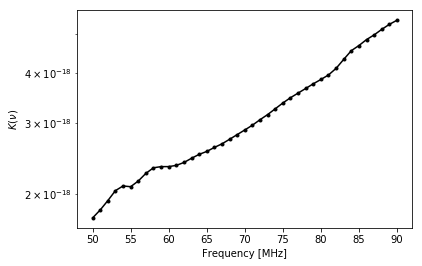

In [12]:
plt.semilogy(freqs,K_nu,'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)$')
plt.savefig(impath+'K_nu.png')

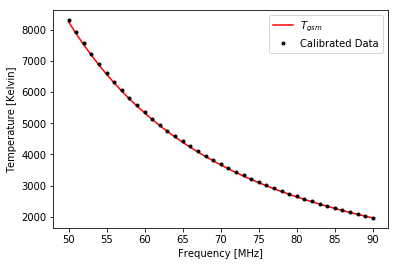

In [13]:
plt.plot(freqs,Tgsm, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,K_nu*Tmeas,'.k', label = 'Calibrated Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig(impath+'calibrated.png')

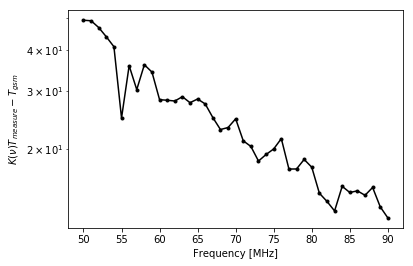

In [14]:
plt.semilogy(freqs,abs(K_nu*Tmeas - Tgsm),'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig(impath+'KTmeas-Tgsm.png')

JNC

In [15]:
K_nu,Tgsm,Tmeas,Tstd = Calibrate(paths_jnc,dates,calibration='JNC')

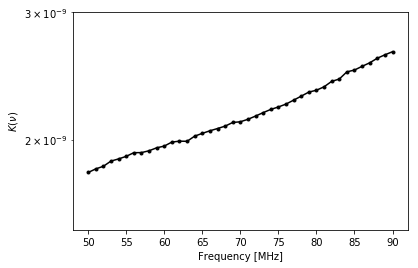

In [16]:
plt.semilogy(freqs,K_nu,'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)$')
plt.ylim(1.5e-9,3e-9)
plt.savefig(impath+'K_nu_jnc.png')

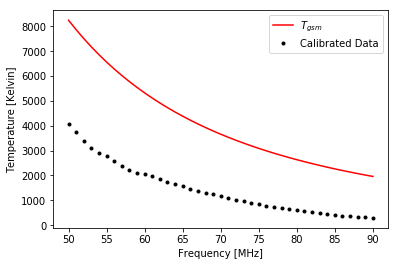

In [17]:
plt.plot(freqs,Tgsm, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,K_nu*Tmeas,'.k', label = 'Calibrated Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig(impath+'calibrated_jnc.png')

In [18]:
K_nu*Tmeas

array([ 4084.18737655,  3748.12737583,  3400.70085853,  3100.35923161,
        2891.57201751,  2786.20059929,  2602.30585804,  2376.35234189,
        2211.64312342,  2120.51539028,  2040.37258729,  1965.15158688,
        1853.92662356,  1732.30426244,  1648.01191556,  1565.57689716,
        1468.38768782,  1393.69014133,  1310.72047116,  1238.55138455,
        1159.49947535,  1087.7436599 ,  1019.61317197,   958.80663455,
         895.63588384,   835.51442751,   783.31767551,   738.25378707,
         694.00157301,   649.8783103 ,   603.7519391 ,   564.03111797,
         530.65016823,   485.18177715,   448.64471493,   417.90350136,
         387.51472883,   360.49698374,   337.55130883,   313.05611457,
         291.79739457])

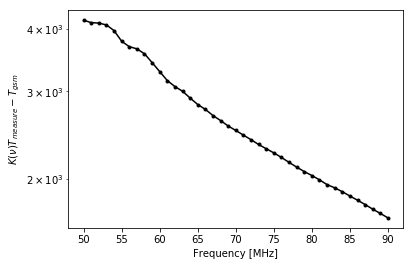

In [19]:
plt.semilogy(freqs,abs(K_nu*Tmeas - Tgsm),'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig(impath+'KTmeas-Tgsm_jnc.png')

# Dates second try

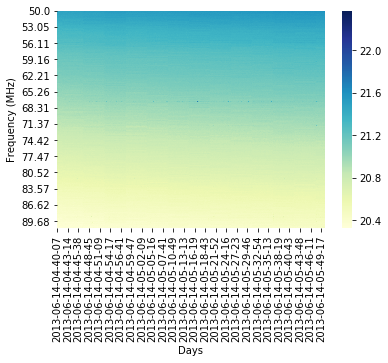

In [20]:
# Quality check
dates = ['2013-06-14-04-40-07','2013-06-14-05-50-01']
Check_quality(path,dates,savepath = impath)

In [21]:
dates = ['2013-06-14-04-40-07','2013-06-14-05-50-01','2013-06-14 04:45:00.000','2013-06-14 05:50:00.000']

$\chi^2$

In [22]:
K_nu,Tgsm,Tmeas,Tstd = Calibrate(paths,dates)

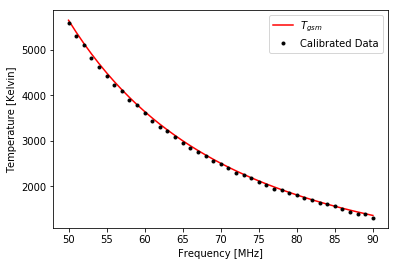

In [23]:
plt.plot(freqs,Tgsm, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,K_nu*Tmeas,'.k', label = 'Calibrated Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig(impath+'calibrated_2.png')

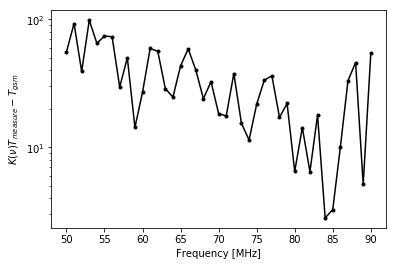

In [24]:
plt.semilogy(freqs,abs(K_nu*Tmeas - Tgsm),'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig(impath+'KTmeas-Tgsm_2.png')

JNC

In [25]:
K_nu,Tgsm,Tmeas,Tstd = Calibrate(paths_jnc,dates,calibration='JNC')

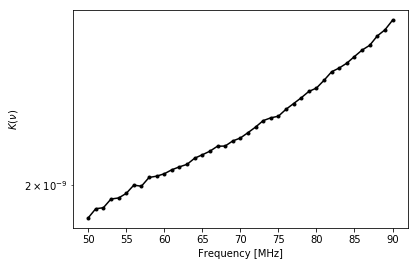

In [26]:
plt.semilogy(freqs,K_nu,'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)$')
plt.savefig(impath+'K_nu_jnc_2.png')

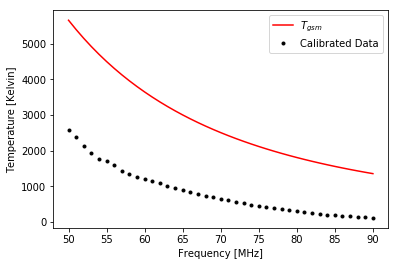

In [27]:
plt.plot(freqs,Tgsm, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,K_nu*Tmeas,'.k', label = 'Calibrated Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig(impath+'calibrated_jnc_2.png')

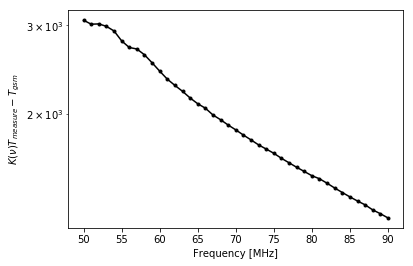

In [28]:
plt.semilogy(freqs,abs(K_nu*Tmeas - Tgsm),'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig(impath+'KTmeas-Tgsm_jnc_2.png')

# More dates...

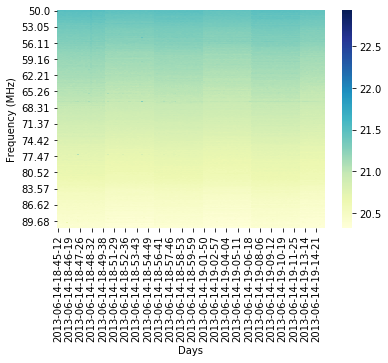

In [29]:
# Quality check
dates = ['2013-06-14-18-45-12','2013-06-14-19-15-05']
Check_quality(path,dates,savepath = impath)

In [51]:
dates = ['2013-06-14-18-45-12','2013-06-14-19-15-05','2013-06-14 18:50:00.000','2013-06-14 19:15:00.000']

$\chi^2$

In [52]:
K_nu,Tgsm,Tmeas,Tstd = Calibrate(paths,dates)

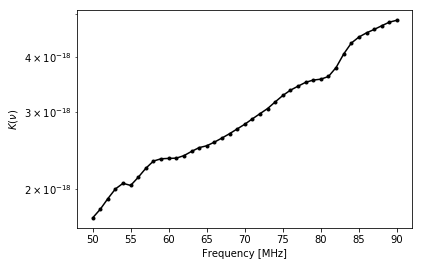

In [53]:
plt.semilogy(freqs,K_nu,'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)$')
plt.savefig(impath+'K_nu_3.png')

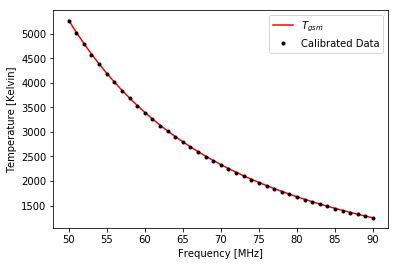

In [54]:
plt.plot(freqs,Tgsm, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,K_nu*Tmeas,'.k', label = 'Calibrated Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig(impath+'calibrated_3.png')

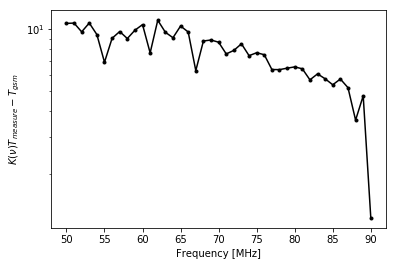

In [56]:
plt.semilogy(freqs,abs(K_nu*Tmeas - Tgsm),'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig(impath+'KTmeas-Tgsm_3.png')

JNC

In [35]:
K_nu,Tgsm,Tmeas,Tstd = Calibrate(paths_jnc,dates,calibration='JNC')

Text(0,0.5,u'$K(\\nu)$')

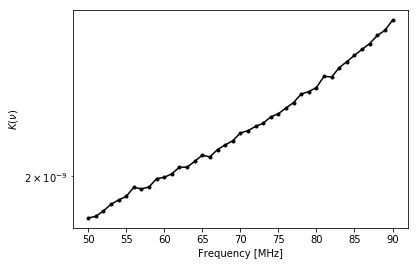

In [36]:
plt.semilogy(freqs,K_nu,'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)$')
plt.savefig(impath+'K_nu_jnc_3.png')

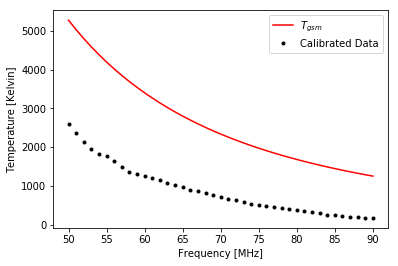

In [37]:
plt.plot(freqs,Tgsm, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,K_nu*Tmeas,'.k', label = 'Calibrated Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig(impath+'calibrated_jnc_3.png')

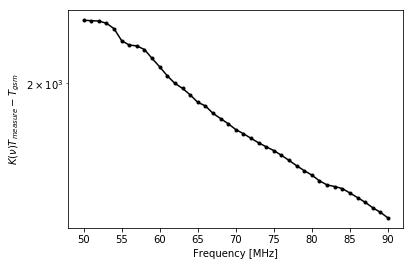

In [38]:
plt.semilogy(freqs,abs(K_nu*Tmeas - Tgsm),'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig(impath+'KTmeas-Tgsm_jnc_3.png')

# Still don't like it...

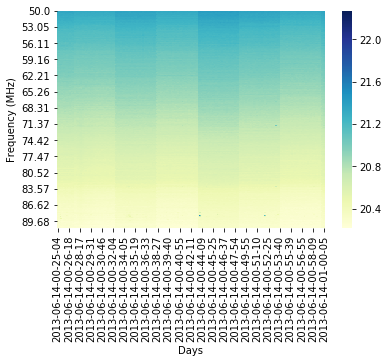

In [39]:
# Quality check
dates = ['2013-06-14-00-25-04','2013-06-14-01-00-06']
Check_quality(path,dates,savepath = impath)

In [40]:
dates = ['2013-06-14-00-25-04','2013-06-14-01-00-06','2013-06-14 00:30:00.000','2013-06-14 01:00:00.000']

$\chi^2$

In [41]:
K_nu,Tgsm,Tmeas,Tstd = Calibrate(paths,dates)

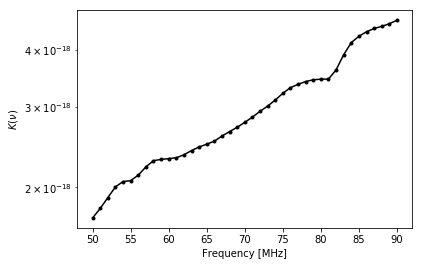

In [42]:
plt.semilogy(freqs,K_nu,'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)$')
plt.savefig(impath+'K_nu_4.png')

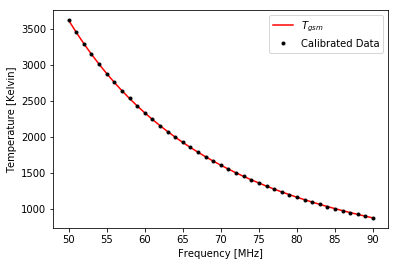

In [43]:
plt.plot(freqs,Tgsm, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,K_nu*Tmeas,'.k', label = 'Calibrated Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig(impath+'calibrated_4.png')

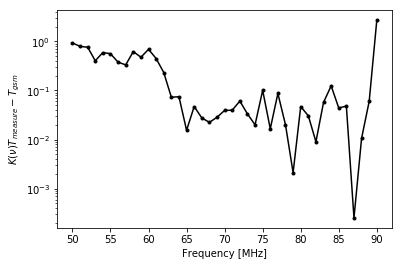

In [44]:
plt.semilogy(freqs,abs(K_nu*Tmeas - Tgsm),'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig(impath+'KTmeas-Tgsm_4.png')

JNC

In [45]:
K_nu,Tgsm,Tmeas,Tstd = Calibrate(paths_jnc,dates,calibration='JNC')

Text(0,0.5,u'$K(\\nu)$')

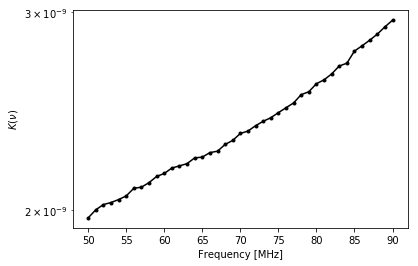

In [46]:
plt.semilogy(freqs,K_nu,'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)$')
plt.savefig(impath+'K_nu_jnc_4.png')

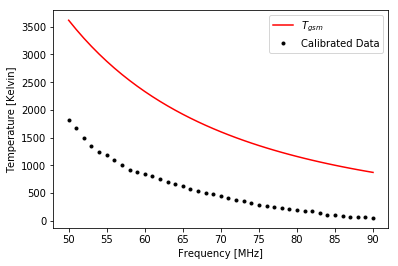

In [47]:
plt.plot(freqs,Tgsm, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,K_nu*Tmeas,'.k', label = 'Calibrated Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig(impath+'calibrated_jnc_4.png')

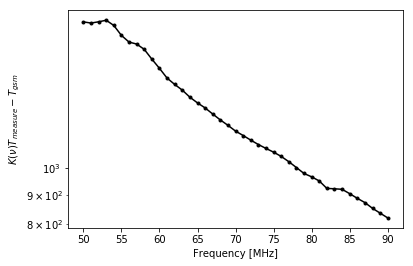

In [48]:
plt.semilogy(freqs,abs(K_nu*Tmeas - Tgsm),'.-k')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig(impath+'KTmeas-Tgsm_jnc_4.png')

In [49]:
for i in range(len(Temps.columns.values)):
    print Temps.columns.values[i]

NameError: name 'Temps' is not defined